In [23]:
import numpy as np
from faiss.contrib.evaluation import knn_intersection_measure
import faiss
import sys


class Object(object):
    pass


self = Object()
self.root = "/checkpoint/marialomeli/offline_faiss/bigann/"

self.eval_dir = self.root + "bigann_1B_in_bigann_1B/eval"
# self.index_factory_fn = 'OPQ64_IVF65536_PQ64' #baseline TBD

self.k = 50
index_strings = [
    "IVF1048576_PQ128",
    "IVF1048576_PQ64",
]
colors = ["g", "b", "r", "m", "y", "c"]  #'k' for baseline
I_a_gt_file = f"{self.eval_dir}/I_a_gt.npy"
I_a_gt = np.load(I_a_gt_file)
all_knn = []
nprobes = sorted([1024,2048,16384,32768,65536,8192,131072])

#sorted([1024,2048,8192,16384,65536])

    
for index_factory_fn in index_strings:
    helper = []
    for nprobe in nprobes:
        I_a_ann_file = f"{self.eval_dir}/I_a_ann_{index_factory_fn}_np{nprobe}.npy"
        I_a_ann = np.load(I_a_ann_file)
        print(
            f"I_a_ann_{index_factory_fn}_np{nprobe}.npy knn intersection measure with nprobe {nprobe}: {knn_intersection_measure(I_a_gt, I_a_ann)}"
        )
        helper.append(knn_intersection_measure(I_a_gt, I_a_ann))
    all_knn.append(helper)

I_a_ann_IVF1048576_PQ128_np1024.npy knn intersection measure with nprobe 1024: 0.980946
I_a_ann_IVF1048576_PQ128_np2048.npy knn intersection measure with nprobe 2048: 0.987706
I_a_ann_IVF1048576_PQ128_np8192.npy knn intersection measure with nprobe 8192: 0.990662
I_a_ann_IVF1048576_PQ128_np16384.npy knn intersection measure with nprobe 16384: 0.990794
I_a_ann_IVF1048576_PQ128_np32768.npy knn intersection measure with nprobe 32768: 0.990812
I_a_ann_IVF1048576_PQ128_np65536.npy knn intersection measure with nprobe 65536: 0.990812
I_a_ann_IVF1048576_PQ128_np131072.npy knn intersection measure with nprobe 131072: 0.990812
I_a_ann_IVF1048576_PQ64_np1024.npy knn intersection measure with nprobe 1024: 0.833404
I_a_ann_IVF1048576_PQ64_np2048.npy knn intersection measure with nprobe 2048: 0.836484
I_a_ann_IVF1048576_PQ64_np8192.npy knn intersection measure with nprobe 8192: 0.837726
I_a_ann_IVF1048576_PQ64_np16384.npy knn intersection measure with nprobe 16384: 0.837768
I_a_ann_IVF1048576_PQ64_

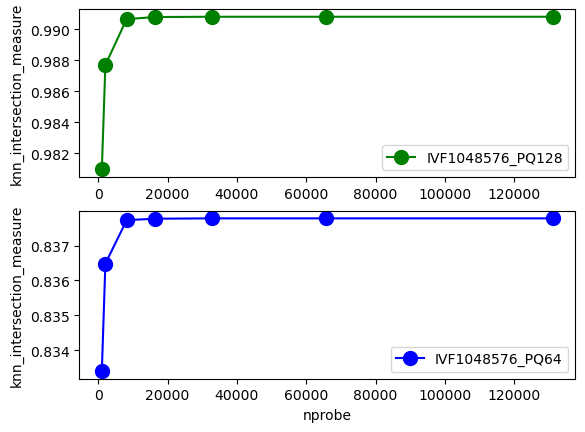

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()
#for i, knn in enumerate(all_knn):
plt.subplot(2, 1, 1)
plt.plot(nprobes, all_knn[0], "o-", markersize=10, color=colors[0], label=index_strings[0])
#plt.xscale("log")
#plt.xlabel("nprobe")
plt.ylabel("knn_intersection_measure")
#plt.title("knn intersection measure")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(nprobes, all_knn[1], "o-", markersize=10, color=colors[1], label=index_strings[1])
plt.xlabel("nprobe")
plt.ylabel("knn_intersection_measure")
#plt.title("knn intersection measure")
plt.legend()
plt.show()

In [25]:
16384/1048576

0.015625